In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
testpath = "./2016_edition_augmented/ptbdb_abnormal.csv"


In [103]:
df1 = pd.read_csv('./2016_edition_augmented/ptbdb_normal.csv')
df2 = pd.read_csv('./2016_edition_augmented/ptbdb_abnormal.csv')

In [104]:
for trains in df1:
    df1.columns = list(range(len(df1.columns)))
    
for tests in df2:
    df2.columns = list(range(len(df2.columns)))

In [105]:
dataset = pd.concat([df1, df2], axis=0).sample(frac=1.0, random_state =0).reset_index(drop=True)

In [106]:
dataset.shape

(14550, 188)

In [107]:
dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.00000,0.487164,0.368582,0.424205,0.346577,0.328851,0.287897,0.295232,0.333741,0.306846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.96063,0.981252,0.764154,0.410949,0.155980,0.009749,0.064867,0.130484,0.123360,0.126359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='Count'>

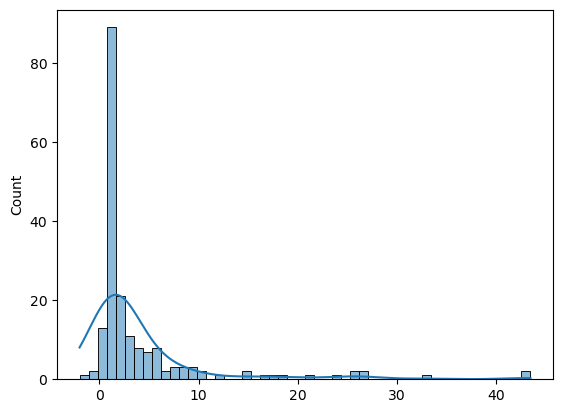

In [108]:
import seaborn as sns
sns.histplot(dataset.skew(), bins = 50, kde = True)

In [109]:
##split into train and test
import pandas as pd
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dataset, test_size=0.5, random_state=42, shuffle=True)

In [110]:
train_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10911,1.0,0.692022,0.461967,0.078850,0.073284,0.158627,0.136364,0.174397,0.147495,0.160482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2682,1.0,0.995169,0.938164,0.810628,0.659903,0.535266,0.336232,0.271498,0.200966,0.125604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
x_train = train_df[train_df.columns].iloc[:,:-1] #usecols=range(187)
y_train = train_df[train_df.columns].iloc[:,0] #usecols=[187].iloc[:,0]
x_train.shape

(7275, 187)

In [112]:
y_train

10911    1.000000
2682     1.000000
8957     0.932438
2508     0.972344
7631     0.930111
           ...   
5191     1.000000
13418    0.975610
5390     0.904716
860      1.000000
7270     1.000000
Name: 0, Length: 7275, dtype: float64

In [113]:
x_test = test_df[test_df.columns].iloc[:,:-1]
y_test = test_df[test_df.columns].iloc[:,0]
x_test.shape

(7275, 187)

In [114]:
dataset[187].unique() ##BINARY DATASET:USE ML

array([1., 0.])

In [129]:
def plot(x_data, y_data, classes=range(1), plots_per_class=10):

    f, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(10,10))
    for i in classes:
        for j in range(plots_per_class):
            ax[i].set_title("class{}".format(i))
            ax[i].plot(x_data[y_data == i].iloc[j,:], color="blue", alpha=.5)
            
#plot(x_train, y_train)

In [100]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
10911,1.000000,0.692022,0.461967,0.078850,0.073284,0.158627,0.136364,0.174397,0.147495,0.160482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2682,1.000000,0.995169,0.938164,0.810628,0.659903,0.535266,0.336232,0.271498,0.200966,0.125604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8957,0.932438,0.723825,0.483603,0.323588,0.050573,0.059265,0.089688,0.170288,0.292770,0.453971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2508,0.972344,0.428433,0.027656,0.000000,0.032994,0.135856,0.152838,0.171276,0.172732,0.183406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7631,0.930111,0.586545,0.293272,0.189419,0.320052,0.349445,0.362508,0.383410,0.368387,0.385369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,1.000000,0.836935,0.433530,0.233137,0.032089,0.000000,0.013098,0.189260,0.280943,0.289456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13418,0.975610,0.881801,0.843340,0.906191,0.727955,0.696998,0.677298,0.621013,0.605066,0.597561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.904716,0.726300,0.504132,0.345163,0.287798,0.274672,0.251823,0.232863,0.229947,0.232377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,1.000000,0.890039,0.825356,0.661708,0.401682,0.204398,0.124838,0.072445,0.202458,0.252264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

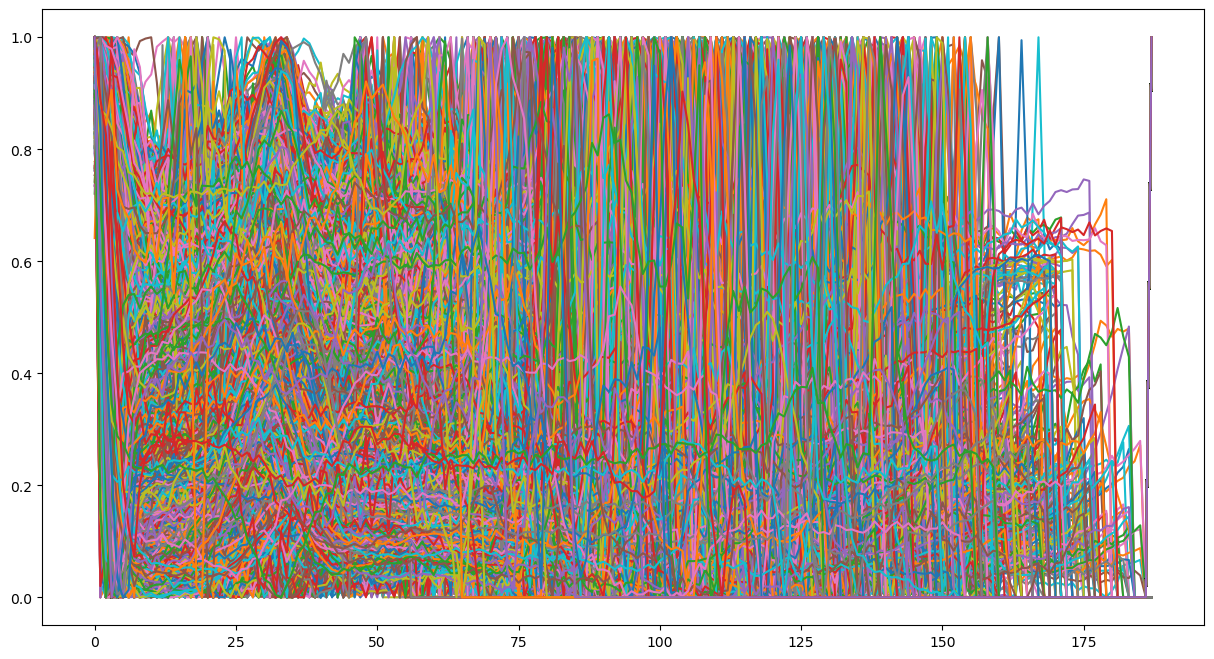

In [120]:
def plot_rows(dataset):
    transposed_df = dataset # Transpose the dataset
    
    # Plot each row as a line in the same graph
    plt.figure(figsize=(15,8))
    for i in range(transposed_df.shape[0]):
        plt.plot(transposed_df.iloc[i, :])
        
    plt.show()  # Display the plot

# Assuming your dataset is a pandas DataFrame named 'df'
plot_rows(train_df)

C:\Users\dell\AppData\Local\Temp\ipykernel_6764\3029105300.py:5: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(data[y_train==classnumber].iloc[:n_samples,:],


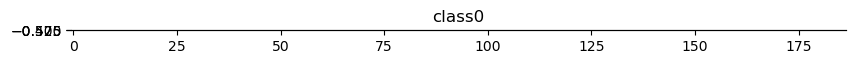

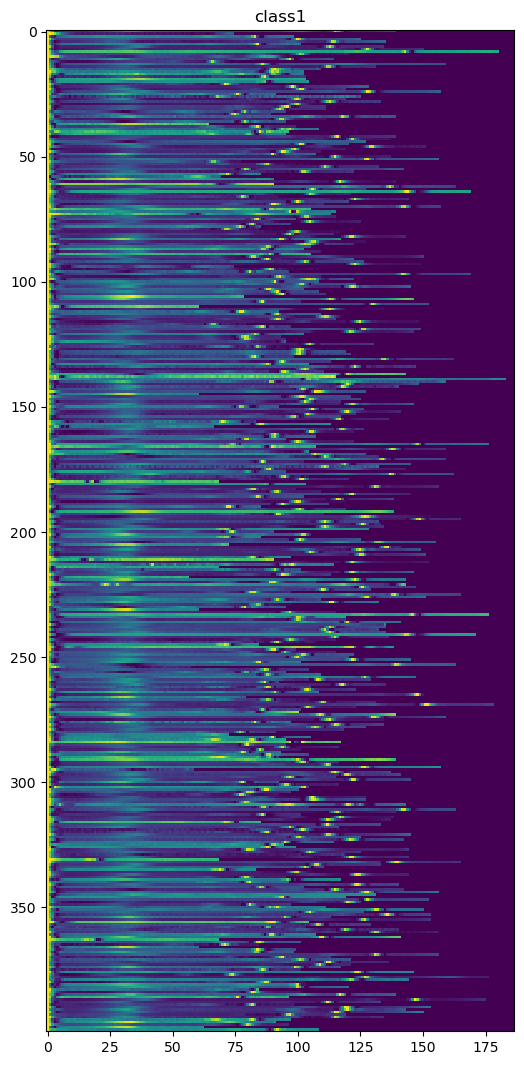

In [121]:
def class_spec(data, classnumber, n_samples):

    fig = plt.figure(figsize=(10,13))
    if type(data)==pd.DataFrame:        
        plt.imshow(data[y_train==classnumber].iloc[:n_samples,:], 
               cmap="viridis", interpolation="nearest")
    else:
        plt.imshow(data[y_train==classnumber][:n_samples,:], 
               cmap="viridis", interpolation="nearest")
    plt.title("class{}".format(classnumber))
    plt.show()
    
for i in range(2):
    class_spec(x_train, i, 400)

In [124]:
#y_train.value_counts().plot(kind="bar", title="y_train")

In [125]:
#y_test.value_counts().plot(kind="bar", title="y_test")

## Preprocessing 

In [126]:
from scipy.signal import gaussian, decimate
from scipy.sparse import csr_matrix

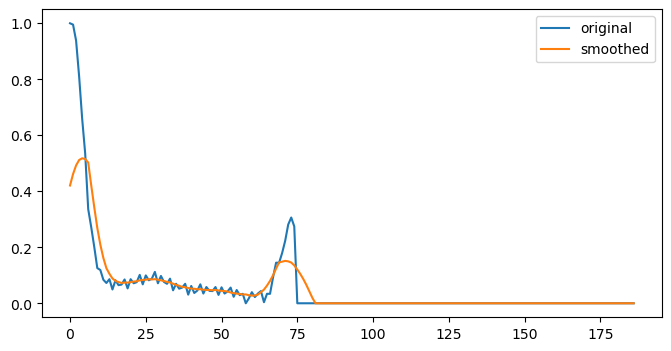

In [127]:
def gaussian_smoothing(data, window, std):
    gauss = gaussian(window ,std, sym=True)
    data = np.convolve(gauss/gauss.sum(), data, mode='same')
    return data

def gauss_wrapper(data):
    return gaussian_smoothing(data, 12, 7)

fig = plt.figure(figsize=(8,4))
plt.plot(x_train.iloc[1,:], label="original")
plt.plot(gauss_wrapper(x_train.iloc[1,:]), label="smoothed")
plt.legend()

In [135]:
def gradient(data, normalize=True):
    data = data.diff(axis=1, periods=3)
    if normalize:
        data = data.apply(lambda x: x/x.abs().max(), axis=1)
    return data

def preprocess(data): 
    data = data.abs().rolling(2, axis=1).max()
    data = data.fillna(method="bfill",axis=1)
    #data = np.apply_along_axis(gauss_wrapper, 1, data)
    data = decimate(data, axis=1, q=5)
    data[np.abs(data) < .05] = 0
    return pd.DataFrame(data)

x_train_grad = gradient(x_train)
x_test_grad = gradient(x_test)

x_train_preprocessed = preprocess(pd.concat([x_train, x_train_grad, gradient(x_train_grad)], axis=1))
x_test_preprocessed = preprocess(pd.concat([x_test, x_test_grad, gradient(x_test_grad)], axis=1))

In [136]:
#plot_rows(x_train_preprocessed)

In [137]:
for i in range(2):
    class_spec(x_train_preprocessed, i, 200)

C:\Users\dell\AppData\Local\Temp\ipykernel_6764\3029105300.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.imshow(data[y_train==classnumber].iloc[:n_samples,:],


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1000x1300 with 0 Axes>

In [ ]:
#https://www.kaggle.com/code/prashantkarwasra/ecg-heartbeat-categorization-machine-learning#Building-Model